In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from IPython.display import Image 
path = 'C:\\Users\\Jongjae\\Project\\Home_Credit\\'
train = pd.read_csv(path + 'application_train.csv')
test = pd.read_csv(path + 'application_test.csv')
bureau = pd.read_csv(path + 'bureau.csv')
bureau_balance = pd.read_csv(path + 'bureau_balance.csv')

# Kaggle Proejct - "Home Credit Default Risk"

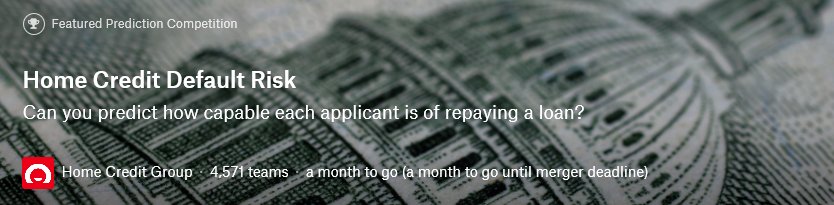

In [5]:
Image(filename = path + 'Company.png')

# Home Credit 회사 개요 # 
- 설립
    - 1997년 in 체코
- 형태
    - International non-bank financial Institution (비은행계 금융기관)
- 활동국
    - 총 14개 국가
- 제공하는 Service: 
    - 은행계 금융권에서 대출을 받을 수 없는 사람들에게 대출 서비스 제공
- Active 고객수
    - 1,500만명이며, 2/3 가 Asia에 있고, 그 중에 7.3백만명이 Chinese.
- 대주주 
    - PPF (Privately held international Financial and Investment group, Netherlands), 지분 88.62% 보유
- 사업 확장 형태
    - 체코 -> 슬로바키아 -> 러시아, 카자흐스탄, 우크라이나, 벨로루시 -> 아시아 (중국, 인디아, 인도네시아, 필리핀, 베트남) -> 2015년 부터 Sprint Corporation과 합작으로 미국에 진출

# Home Credit이 제시한 문제
- **Can you predict how capable each applicant is of repaying a loan?**
- 대출을 신청한 사람들의 대출 상환 여부에 대하여 상환이 가능하다와 상환이 불가능하다로 `예측`할 수 있겠는가? 
    - **Details**
        - 과거 Loan 신청자들의 Loan 상환 데이터를 활용하여, Loan 신청자들이 융자를 분활 상환하여 갚을 능력이 되는지, 아닌지를 예측하는 내용.
        - training data에 [상환했다/못했다]라는 labelling이 되어 있고, 여기서 최종 목표는 신규로 만든 모델을 training시켜서 label을 잘 예측하게 하는 것. (Supervised)
        - Label은 Binary 형태. (Classification) 
                - `0`: 정해진 시간에 융자를 상환
                - `1`: 정해진 시간에 융자를 상환하지 못하는 경우

# Data Specification
- `Home Credit`에서 제공하는 데이터이며, 이 회사는 은행 대출이 되지 않는 사람들에게 융자를 대출해주는 서비스를 제공한다. 
- 아래와 같이 7개 Data set이 있다.
    - 1) Application_test.csv & Application_train.csv 
    - 2) bureau.csv
    - 3) bereau_balance.csv
    - 4) credit_card_balance.csv
    - 5) Installments_payments.csv
    - 6) POS_CASH_balance.csv
    - 7) previous_application.csv

# *1. application_train.csv & application_test.csv*
- application_test.csv 와 application_train.csv는 *한 컬럼(Target)을 제외한* 모든 다른 Column의 이름은 같다. -> Code_book Proved
- ID (Loan application) 값은 Test와 Train 데이터는 완전히 분리되어 있다. -> Code_book Proved
    - 즉, Test Data와 Train Data의 중복된 ID가 없다는 것. 
- `application_train.csv` shape: (307511, 122)
- `application_test.csv` shape: (48744, 121) 

## - Missing Value Verification ###

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


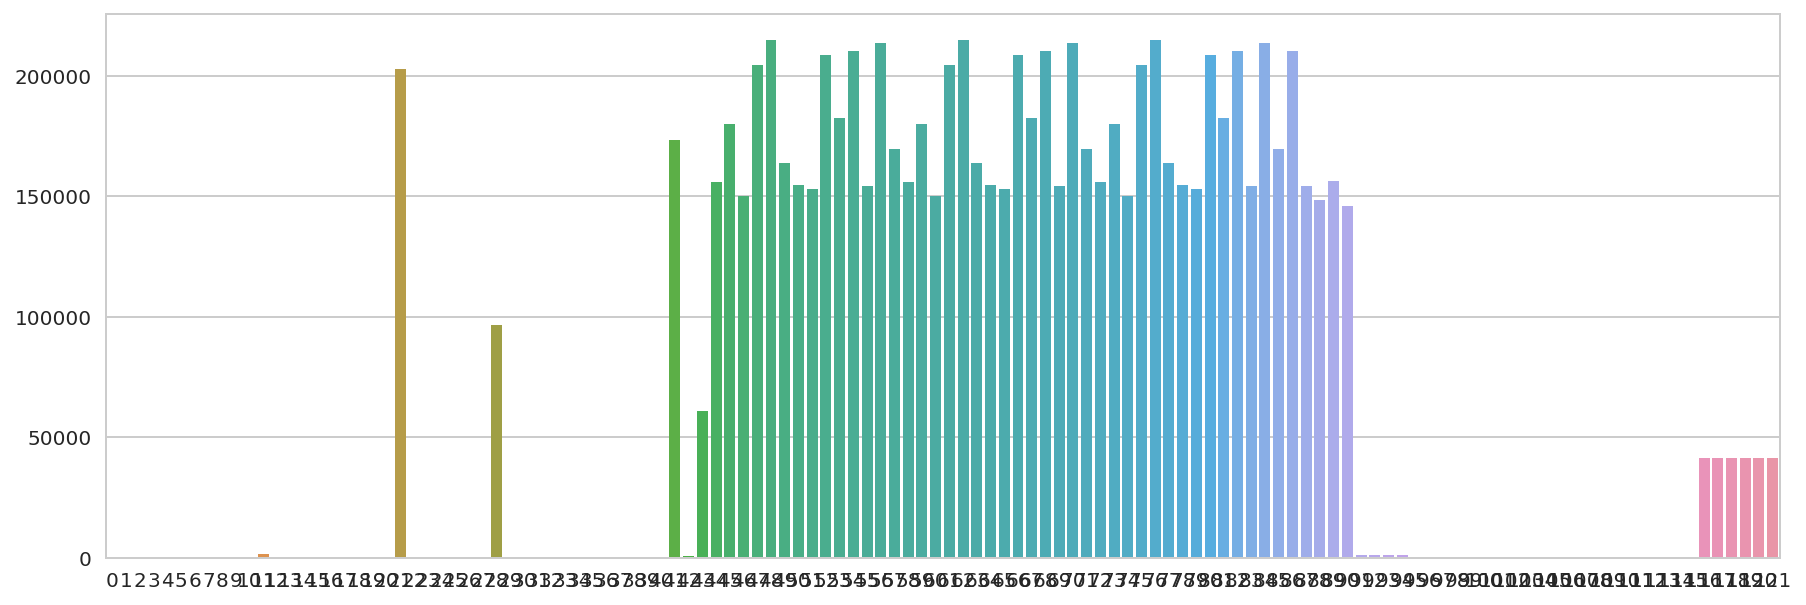

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(np.arange(len(train.isnull().sum().index)), train.isnull().sum().values)

### 1) `SK_ID_CURR` -  Loan 신청인을 `고유 ID`값으로 표시. 
 - **Data Type**: Numeric
 - **Missing Value**: None
 - **Components**: ID 값

### 2) `NAME_CONTRACT_TYPE` - 신청인의 `Loan Type`을 표시
- **Data Type**: String
- **Missing Values**: None
- **Components**: i) Cash_Loans ii) Revolving_Loans
- **Category**: Yes

### 3) `CODE_GENDER` - 신청인의 `성별`을 표시
- **Data Type**: String
- **Missing Values**: None
- **Components**: i) M ii) F iii) XNA(4개)
- **특이사항**: XNA가 4개 포함되어 있는데, XNA가 의미하는 것을 나타내는 문서가 없음. NA(Not Available)에 X가 붙은 것으로 보아, 미기입으로 간주함.
- **Category**: Yes

### 4) `FLAG_OWN_CAR` - 신청인의 `자동차 보유 유무`를 표시
- **Data Type**: String
- **Mising Values**: None
- **Components**: i) Yes ii) No 
- **Category**: Yes

### 5) `FLAG_OWN_REALTY` - 신청인의 `부동산 보유 유무`를 표시
- **Data Type**: String
- **Mising Values**: None
- **Components**: i) Yes ii) No 
- **Category**: Yes

### 6) `CNT_CHILDREN` - 신청인의 `자녀 수`를 표시
- **Data Type**: Numeric
- **Missing Values**: None
- **Components**: 0 ~ 19명 
- **Category**: Yes  (Have to check with our team mates regarding on this)

### 7) `AMT_INCOME_TOTAL` - 신청인의 `수입 내역 총합`
- **Data Type**: Numeric
- **Missing Values**: None
- **Components**: 25,650 ~ 117,000,000 
- **특이사항**: 
    - i) 어떤 특정한 나라인지 모름 
    - ii) 수입 내역이 대출을 신청하고 난 이후의 수입 내역인지, 살면서 모든 수입 내역인지 확인이 안됨.
- **Category**: No 

### 8) `AMT_CREDIT` -  신청한 Loan에 대한 Credit 총합
- **Data Type**: Numeric
- **Missing Values**: None
- **Components**: 45,000 ~ 4,050,000 credits
- **특이사항**: 
    - i) Loan에 대한 Credit은 어떤 방식으로 산출되었나? 동일한 기준이 적용된 것이 맞나? 
    - ii) Column Description에서 "Credit Amount of the Loan"이라고 되어 있는데, 해석한 내용은 "신청한 Loan에 대한 Credit의 총합"이라고 했지만, 앞과 뒤의 Column의 흐름상 이 내용이 사실 "신청인의 Credit 총합"이지 않을까?
- **Category**: No

### 9) `AMT_ANNUITY` - 신청인의 `연금 총합`
- **Data Type**: Numeric
- **Missing Values**: 12 values are missing
- **Components**: 1,615.5 ~ 258,025.5
- **특이사항**: 
    - i) Column Description에 "Loan Annuity"라고 되어 있어서, 이게 연금담보대출을 의미하는 것인지, 신청인이 쌓아둔 연금의 총합을 의미하는 것인지 확인 필요해 보임.
- **Category**: No

### 10) `AMT_GOODS_PRICE`- 대출 상품의 가격
- **Data Type**: Numeric
- **Missing Values**: 278 values are missing
- **Components**: 40,500 ~ 4,050,000
- **특이사항**: 대출 상품의 가격은 이해가 안된다. 신청인의 대출 신청 금액을 의미?
- **Category**: No

### 11) `NAME_TYPE_SUITE` - 대출 신청일에 신청인과 그 동행인
- **Data Type**: String
- **Missing Values**: 1292 values are missing
- **Components**: 
    - i) Unaccompanied: 248,526
    - ii) Family: 40,149
    - iii) Spouse, partner: 11,370
    - iv) Children: 3,267
    - v) Other_A: 866
    - vi) Other_B: 1,770
    - vii) Group of people: 271
- **특이사항**: 
    - i) Other_A와 Other_B에 대한 설명이 없음.
    - ii) 갑자기 든 생각이지만, 보통 대출 신청할 때, 필수 기입 사항과, 선택 기입사항으로 나뉘는데, 필수 기입 사항 한 Category를 찾고, 선택 기입 사항 한 Category를 찾아서 Weight를 나눠 줄 수 있지 않을 까라는 생각이 들었음.
- **Category**: Yes

### 12) `NAME_INCOME_TYPE` - 신청인의 `수입원`
- **Data Type**: String
- **Missing Values**: None
- **Components**:
    - i) Working: 158,774 
    - ii) State servant: 21,703
    - iii) Commercial associate: 71,617
    - iv) Pensioner: 55,362
    - v) Unemployed: 22 ## 실업자에게도 Loan을 해주기는 함, 하지만 극히 소수.
    - vi) Student: 18 ## 학생도 마찬가지로 Loan을 해주기는 하지만, 극히 소수.
    - vii) Businessman: 10 ## 사업가인데, 문제없는 사업가는 은행권 대출아닐까?
    - ix) Maternity leave: 5 ## 출산 휴가 중인 사람
- **Category**: Yes

### 13) `NAME_EDUCATION_TYPE` - 신청인의 `최종 학력`
- **Data Type**: String
- **Missing Values**: None
- **Components**:
    - i) Secondary / secondary special: 218,391 (최종 중학교 졸업)
    - ii) Higher education: 74,863 (최종 고등학교 졸업) 
    - iii) Incomplete higher: 10,277 (고등학교 졸업 유예)
    - iv) Lower secondary: 3,816 (최종 초등학교 졸업)
    - v) Academic degree: 164 (최종 대학교 졸업)
- **특이사항**: 여기서 조사된 내용을 보면, Education Level이 높은 국가는 아닌 것으로 보임.
- **Category**: Yes

### 14) `NAME_FAMILY_STATUS` - 신청인의 `가족 현황`
- **Data Type**: String
- **Missing Values**: None
- **Components**: 
    - i) Single / not married: 45,444명
    - ii) Married: 196,432명
    - iii) Civil marriage: 29,775명
    - iv) Widow: 16,088명
    - v) Separated: 19,770명
    - vi) Unknown: 2명
- **Category**: Yes

### 15) `NAME_HOUSING_TYPE` - 신청인의 `거주지 유형`
- **Data Type**: String
- **Missing Values**: None
- **Components**: 
    - i) House / apartment: 272,868명
    - ii) Rented apartment: 4,881명
    - iii) With parents: 14,840명
    - iv) Municipal apartment(정부 아파트): 11,183명
    - v) Office apartment:, 2,617명
    - vi) Co-op apartment: 1,122명 ## Bying shares of the corporation
- **Category**: Yes

### 16) `REGION_POPULATION_RELATIVE` - 신청인이 사는 지역(Region)의 정규화된 인구 수 
- **Data Type**: Numeric
- **Missing Values**: None
- **Components**: 정규화된 숫자
- **특이사항**: 정규화된 숫자가 높을 수록 인구 밀집 지역에 산다는 의미를 가짐.
- **Category**: No

### 17) `DAYS_BIRTH` - 신청인이 `나이` (기준: Loan 신청일)
- **Data Type**: Numeric with Negative sign
- **Missing Values**: None
- **Components**: 일자로 계산된 나이
- **특이사항**: -로 표시되어 있으며, 일자로 표시되어 있기 때문에, 실제 나이로 변환이 필요할것 처럼 보임.
- **Category**: No

### 18) `DAYS_EMPLOYED`  - 신청인의 현재 직장 `근속일`  (기준: Loan 신청일)
- **Data Type**: Numeric with Negative sign
- **Missing Values**: None
- **Components**: 일자로 계산된 근속일
- **특이사항**: 위와 마찬가지로 숫자 변환이 필요할 것처럼 보임.
- **Category**: No

### 19) `DAYS_REGISTRATION` - 신청인의 `Registration변경일` (기준: Loan 신청일)
- **Data Type**: Numeric with Negative sign
- **Missing Values**: None
- **Components**: 위와 마찬가지로 숫자 변환이 필요할 것으로 보임.
- **특이사항**: 여기서 Registration이 의미하는 것을 파악하지 못하겠음.
- **Category**: No

### 20) `DAYS_REGISTRATION` - 신청인의 `ID변경일` (기준: Loan 신청일)
- **Data Type**: Numeric with Negative sign
- **Missing Values**: None
- **Components**: 위와 마찬가지로 숫자 변환이 필요할 것으로 보임.
- **특이사항**: 여기서도 마찬가지로 ID의 변경에 대한 의미를 파악하지 못하겠음.
- **Category**: No

### 21) `OWN_CAR_AGE` - 신청인의 `차량 연식`
- **Data Type**: String
- **Missing Values**: 202,929 values
- **Components**: 0 ~ 91년 연식
- **특이사항**: 
    - i) 위에 `FLAG_OWN_CAR`의 Feature에서 `Y`라고 답했던 사람의 숫자가 `104,587`이라고 되어 있음.
    - ii) `OWN_CAR_AGE`의 Feature에서 채워진 값은 `104,582`이므로 5명을 제외하고 모두 다 이 항목을 기입해준 것으로 확인됨.
- **Category**: Yes (팀원들과 확인 필요함)

### 22) `FLAG_MOBIL` - 신청인이 신청서에 `휴대폰 번호`를 작성했는가?
- **Data Type**: Numeric
- **Missing Values**: None
- **Components**:
    - i) `1`: Yes 
    - ii) `0`: No
- **특이사항**: 휴대폰이 없어서 기입 안했는 경우도 있을 수 있고, 휴대폰 번호를 알려주기 싫어서 기입 했을 수도 있음, 아래도 똑같음
- **Category**: Yes

### 23) `FLAG_EMP_PHONE` - 신청인이 `EMP PHONE` 정보를 기입했는가?
- **Data Type**: Numeric
- **Missing Values**: None
- **Components**: 
    - i) `1`: Yes
    - ii) `0`: No
- **Category**: Yes

### 24) `FLAG_WORK_PHONE` - 신청인이 `직장 연락처` 정보를 기입했는가?
- **Data Type**: Numeric
- **Missing Values**: None
- **Components**: 
    - i) `1`: Yes
    - ii) `0`: No
- **특이사항**: 직장이 없는 사람은 0을 작성했을 것이므로, 그런 분류의 사람들은 빼고 고려해야 되지 않을까라고 생각됨.
- **Category**: Yes

### 25) `FLAG_CONT_MOBILE` - 기입한 휴대폰으로 연락이 되었나?
- **Data Type**: Numeric
- **Missing Values**: None
- **Components**:
    - i) `1`: Yes
    - ii) `0`: No
- **Category**: Yes

### 26) `FLAG_PHONE` - 신청인이 `집 전화번호`를 기입했는가?
- 1) **Data Type**: Numeric
- 2) **Missing Values**: None
- 3) **Components**:
    - i) `1`: Yes
    - ii) `0`: No
- 4) **Category**: Yes

### 27) `FLAG_EMAIL` - 신청인이 `이메일 주소`를 기입했는가?
- 1) **Data Type**: Numeric
- 2) **Missing Values**: None
- 3) **Components**:
    - i) `1`: Yes
    - ii) `0`: No
- 4) **Category**: Yes

### 28) `OCCUPATION_TYPE` - 신청인의 `직업 종류`는?
- 1) **Data Tye**: String
- 2) **Missing Values**: 96,391 Values
- 3) **Components**:
    - 1) Laborers
    - 2) Core staff
    - 3) Accountants
    - 4) Managers
    - 5) Drivers
    - 6) Sales staff
    - 7) Cleaning staff
    - 8) Cooking staff
    - 9) Private service staff
    - 10) Medicine staff
    - 11) Security staff
    - 12) High skill tech staff
    - 13) Waiters/barmen staff
    - 14) Low-skill Laborers
    - 15) Realty agents
    - 16) Secretaries
    - 17) IT staff
    - 18) HR staff
- 4) **Category**: Yes

### 29) `CNT_FAM_MEMBERS` - 신청인의 `가족 수`는?
- 1) **Data Type**: Float
- 2) **Missing Values**: 2 Values
- 3) **Components**: 1 ~ 20명
- 4) **Category**: Yes

### 30) `REGION_RATING_CLIENT` - 신청인이 사는 Region에서 받은 `Home Credit 회사 등급`
- 1) **Data Type**: Float
- 2) **Missing Values**: None
- 3) **Components**: 1, 2, 3
- 4) **특이사항**: 1이 가장 낮은 등급, 3이 가장 높은 등급
- 5) **Category**: Yes

### 31) `REGION_RATING_CLIENT_W_CITY` - 신청인이 사는 Region이 도시로 여겨지는 곳에서 받은 `Home Credit 회사 등급`
- 1) **Data Type**: Float
- 2) **Missing Values**: None
- 3) **Components**: 1, 2, 3
- 4) **특이사항**: 1이 가장 낮은 등급, 3이 가장 높은 등급
- 5) **Category**: Yes

### 32) `WEEKDAY_APPR_PROCESS_START` - 신청인이 Loan을 신청한 `요일`
- 1) **Data Type**: String
- 2) **Missing Values**: None
- 3) **Components**: 
    - 1) Monday
    - 2) Tuesday
    - 3) Wednesday
    - 4) Thursday
    - 5) Friday
    - 6) Saturday
    - 7) Sunday
- 4) **Category**: Yes

### 33) `HOUR_APPR_PROCESS_START` - 신청인이 Loan을 신청한 `시간`
- 1) **Data Type**: String
- 2) **Missing Values**: None
- 3) **Components**: 0 ~ 23
- 4) **Category**: Yes

### 34) `REG_REGION_NOT_LIV_REGION` - 신청인이 작성한 `영구 주소`가 `연락 주소`와 같은지 다른지
- 1) **Data Type**: Int
- 2) **Missing Values**: None
- 3) **Components**: 0 or 1
- 4) **특이사항**: 
    - 1) `0`: 같다
    - 2) `1`: 다르다
    - 3) `REGION LEVEL`
- 5) **Category**: Yes

### 35) `REG_REGION_NOT_WORK_REGION` - 신청인이 작성한 `영구 주소`가 `직장 주소`와 같은지 다른지
- 1) **Data Type**: Int
- 2) **Missing Values**: None
- 3) **Components**: 0 or 1
- 4) **특이사항**:
    - 1) `0`: 같다
    - 2) `1`: 다르다
    - 3) `REGION LEVEL`
- 5) **Category**: Yes

### 36) `LIVE_REGION_NOT_WORK_REGION` - 신청인이 작성한 `연락 주소`가 `직장 주소`와 같은지 다른지
- 1) **Data Type**: int
- 2) **Missing Values**: None
- 3) **Components**: 0 or 1
- 4) **특이사항**:
    - 1) `0`: 같다
    - 2) `1`: 다르다
    - 3) `REGION LEVEL`
    - 4) Permanents 는 합산해서 봐야 할 것으로 보임(위, 아래 같이) 
- 5) **Category**: Yes

### 37) `REG_CITY_NOT_LIVE_CITY` - 신청인이 작성한 `영구 주소`가 `연락 주소`와 같은지 다른지
- 1) **Data Type**: int
- 2) **Missing Values**: None
- 3) **Components**: 0 or 1
- 4) **특이사항**:
    - 1) `0`: 같다
    - 2) `1`: 다르다
    - 3) `CITY LEVEL`
- 5) **Category**: Yes
    

### 38) `REG_REGION_NOT_WORK_REGION` - 신청인이 작성한 `영구 주소`가 `직장 주소`와 같은지 다른지
- 1) **Data Type**: int
- 2) **Missing Values**: None
- 3) **Components**: 0 or 1
- 4) **특이사항**:
    - 1) `0`: 같다
    - 2) `1`: 다르다
    - 3) `CITY LEVEL`
- 5) **Category**: Yes

### 39) `LIVE_REGION_NOT_WORK_REGION` - 신청인이 작성한 `연락 주소`가 `직장 주소`와 같은지 다른지
- 1) **Data Type**: int
- 2) **Missing Values**: None
- 3) **Components**: 0 or 1
- 4) **특이사항**:
    - 1) `0`: 같다
    - 2) `1`: 다르다
    - 3) `CITY LEVEL`
    - 4) 이 City LEVEL 또한, 묶어서 봐야 할 것으로 보임
- 5) **Category**: Yes

### 40) `ORGANIZATION_TYPE` - 신청인의 `회사 종류`
- 1) **Data Type**: String
- 2) **Missing Values**: None
- 3) **Components**: 총 58개의 기관
- 4) **Category**: Yes

# 아래부터 정규화 된 변수가 연속적으로 나타남

### 41, 42, 43) `EXT_SOURCE_1,2,3` - 외부 정보 (비공개) (정규화)
- 1) **Data Type**: float
- 2) **Mising Values**:
    - 1) `EXT_SOURCE_1`: 173378 values
    - 2) `EXT_SOURCE_2`: 660 values
    - 3) `EXT_SOURCE_3`: 60965 values
- 3) **Components**: 정규화 된 값
- 4) **특이사항**: 어떤 데이터인지 설명이 없음. 분포를 봐서 유추만 해야 할 듯으로 보임.
- 5) **Category**: No

### 44 ~ 90) 신청인의 `거주지` 건물의 Detail한 상태 (정규화)
- 44) APARTMENTS_AVG
- 45) BASEMENTSARE_AVG
- 46) YEARS_BEGINEXPLUATATION_AVG
- 47) YEARS_BUILD_AVG
- 48) COMMONAREA_AVG
- 49) ELEVATORS_AVG
- 50) ENTRANCES_AVG
- 51) FLOORSMAX_AVG
- 52) FLOORSMIN_AVG
- 53) LANDAREA_AVG
- 54) LIVINGAPARTMENTS_AVG
- 55) LIVINGAREA_AVG
- 56) NONLIVINGAPARTMENTS_AVG
- 57) NONLIVINGAREA_AVG
- 58) APARTMENTS_MODE
- 59) BASEMENTSAREA_MODE
- 60) YEARS_BEGINEXPLUATATION_MODE
- 61) YEARS_BUILD_MODE
- 62) COMMONAREA_MODE
- 63) ELEVATORS_MODE
- 64) ENTRANCES_MODE
- 65) FLOORSMAX_MODE
- 66) FLOORSMIN_MODE
- 67) LANDAREA_MODE
- 68) LIVINGAPARTMENTS_MODE
- 69) LIVINGAREA_MODE
- 70) NONLIVINGAPARTMENTS_MODE
- 71) NONLIVINGAREA_MODE
- 72) APARTMENTS_MEDI
- 73) BASEMENTSAREA_MEDI
- 74) YEARS_BEGINEXPLUATATION_MEDI
- 75) YEARS_BUILD_MEDI
- 76) COMMONAREA_MEDI
- 77) ELEVATORS_MEDI
- 78) ENTRANCES_MEDI
- 79) FLOORSMAX_MEDI
- 80) FLOORSMIN_MEDI
- 81) LANDAREA_MEDI
- 82) LIVINGAPARTMENTS_MEDI
- 83) LIVINGAREA_MEDI
- 84) NONLIVINGAPARTMENTS_MEDI
- 85) NONLIVINGAREA_MEDI
- 86) FONDKAPREMONT_MODE
- 87) HOUSETYPE_MODE
- 88) TOTALAREA_MODE
- 89) WALLSMATERIAL_MODE
- 90) EMERGENCYSTATE_MODE

### 91) `OBS_30_CNT_SOCIAL_CIRCLE` - How many observation of client's social surroundings with observable 30 DPD (days past due) default
- 1) **Data Type**: float
- 2) **Missing Values**: 1021 values
- 3) **Components**: 0 ~ 348
- 4) **특이사항**: 주어진 정보로만 보면 어떤 내용인지 알기 힘듦.
- 5) **Category**: Yes

### 92) `DEF_30_CNT_SOCIAL_CIRCLE` - How many observation of client's social surroundings defaulted on 30 DPD (days past due)
- 1) **Data Type**: float
- 2) **Missing Values**: 1021 values
- 3) **Components**: 0 ~ 34
- 4) **특이사항**: 
    - 1) 주어진 정보로만 보면 어떤 내용인지 알기 힘듦. 
    - 2) 바로 위의 Data와 missing values값이 같음. 
- 5) **Category**: Yes

### 93) `OBS_60_CNT_SOCIAL_CIRCLE` - How many observation of client's social surroundings with observable 60 DPD (days past due) default
- 1) **Data Type**: float
- 2) **Missing Values**: 1021 values
- 3) **Components**: 0 ~ 344
- 4) **특이사항**: 주어진 정보로만 보면 어떤 내용인지 알기 힘듦.
- 5) **Category**: Yes

### 94) `DEF_60_CNT_SOCIAL_CIRCLE` - How many observation of client's social surroundings defaulted on 60 DPD (days past due)
- 1) **Data Type**: float
- 2) **Missing Values**: 1021 values
- 3) **Components**: 0 ~ 24
- 4) **특이사항**: 
    - 1) 주어진 정보로만 보면 어떤 내용인지 알기 힘듦. 
    - 2) 바로 위의 Data와 missing values값이 같음. 
- 5) **Category**: Yes

### 95) `DAYS_LAST_PHONE_CHANGE` - 신청인이 Loan 신청하기 얼마나 이전에 `휴대폰을 변경`하였는가?
- 1) **Data Type**: float
- 2) **Missing Values**: 1
- 3) **Components**: 
    i) 일 데이터이기 때문에 형태 변환이 필요함.
    ii) - sign이 붙어 있기에 조심해야 함.
- 4) **Category**: Yes

### 96 ~ 115) `FLAG_DOCUMENT_2 ~ 21`
- 1) **Data Type**: int
- 2) **Missing Values**: None
- 3) **Components**: 
    - `1`: Yes로 가정 (이전 FLAG에서는 1이 YES)
    - `0`: No로 가정 (이전 FLAG에서는 0이 NO)
- 4) **주의사항**: 
    - 1) Components가 1과 0으로 나뉘어 있는데, 여기에 대한 설명이 없다. 따라서, 앞서 FLAG에서는 1이 YES로 나왔고 0이 NO로 나왔기에, 이렇게 가정하지만, 확실하지는 않으므로 주의해야 함.
    - 2) 위의 사항을 검증하기 위해서, 1이 더 많이 나오는지 확인 필요함. 구비 서류는 보통 Yes 이 더 많다는 것을 가정으로 볼것임.
- 5) **Category**: Yes

### 116) `AMT_REQ_CREDIT_BUREAU_DAY` - 신청서 접수 1시간 전, Credit Bureau에 문의 연락이 온 횟수
- **Data Type**: Float
- **Missing Values**: 41,519 values
- **Components**: 0 ~ 4번
- **Category**: Yes

### 117) `AMT_REQ_CREDIT_BUREAU_DAY` - 신청서 접수 1일 전, Credit Bureau에 문의 연락온 횟수 
- **Data Type**: Float
- **Missing Values**: 41,519 values
- **Components**: 0 ~ 9번
- **Category**: Yes
- **특이사항**: 1시간전에 연락온 횟수는 제외 함.

### 118) `AMT_REQ_CREDIT_BUREAU_WEEK` - 신청서 접수 1주 전, Credit Bureau에 문의 연락온 횟수 
- **Data Type**: Float
- **Missing Values**: 41,519 values
- **Components**: 0 ~ 8번
- **Category**: Yes
- **특이사항**: 
    - 1) (1시간 전에 연락온 횟수), (1일 전에 연락온 횟수)는 제외 함. 
    - 2) Missing Values 값은 똑같음 

### 119) `AMT_REQ_CREDIT_BUREAU_MON`  - 신청서 접수 1달 전, Credit Bureau에 문의 연락온 횟수
- **Data Type**: Float
- **Missing Values**: 41,519 values
- **Components**: 0 ~ 24번
- **특이사항**: 
     - 1) (1시간 전에 연락온 횟수), (1일 전에 연락온 횟수), (1주 전에 연락온 횟수) 는 제외 함.
    - 2) Missing Values 값은 위와 똑같음
- **Category**: Yes

### 120) `AMT_REQ_CREDIT_BUREAU_QRT`  - 신청서 접수 1 분기 전, Credit Bureau에 문의 연락온 횟수
- **Data Type**: Float
- **Missing Values**: 41,519 values
- **Components**: 0 ~ 261번
- **특이사항**: 
     - 1) (1시간 전에 연락온 횟수), (1일 전에 연락온 횟수), (1주 전에 연락온 횟수), (1달 전에 연락온 횟수) 는 제외 함.
    - 2) Missing Values 값은 위와 똑같음
- **Category**: Yes

### 121) `AMT_REQ_CREDIT_BUREAU_YEAR`  - 신청서 접수 1년 전, Credit Bureau에 문의 연락온 횟수
- **Data Type**: Float
- **Missing Values**: 41,519 values
- **Components**: 0 ~ 25번
- **특이사항**: 
     - 1) (1시간 전에 연락온 횟수), (1일 전에 연락온 횟수), (1주 전에 연락온 횟수), (1달 전에 연락온 횟수), (1분기 전에 연락온 횟수) 는 제외 함.
    - 2) Missing Values 값은 위와 똑같음
- **Category**: Yes

# *2. Bureau.csv*
- `다른 Financial Institution`의 과거 credit 기록
- 하지만, 1개의 현재 대출 건에 대해, 여러개의 과거 Credit이 있을 수 있음. (1:N)
- 다른 Data와 Mapping을 할 때, SK_ID_CURR로 해야 할 것으로 보임.
- `Bureau.csv` shape: (1716428, 17)

## - Missing Value Verification ###

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


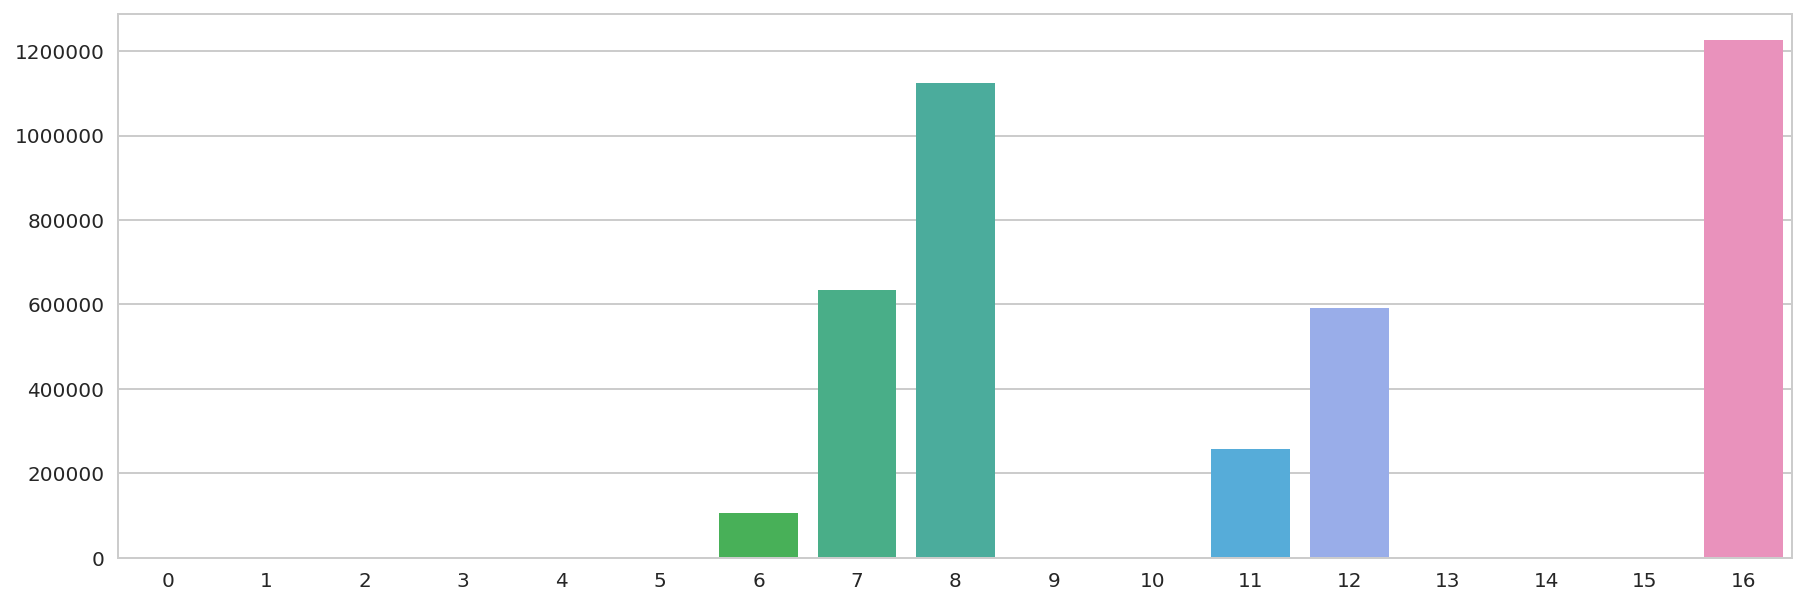

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(np.arange(len(bureau.isnull().sum().index)), bureau.isnull().sum().values)

### 1) `SK_ID_CURR` - 신청인의 ID값
- 1) **Data Type**: Int
- 2) **Missing Values**: None
- 3) **Components**: ID 값
- 4) **특이사항**: 
    - 1) train.csv ID 값과 test.csv ID 값이 모두 섞여서 포함되어 있음.
    - 2) 따라서, train할 때 잘 구별해서 써야 할 것으로 보임.

### 2) `SK_ID_BUREAU` - 신청인의 과거 Credit 기록 ID 1개 값
- 1) **Data Type**: Int
- 2) **Missing Values**: None
- 3) **Components**: 다른 기관에서의 과거 Credit 기록
- 4) **특이사항**:
    - 1) 1개의 `SK_ID_CURR`에 여러개의 `SK_ID_BUREAU`가 있을 수 있음.

### 3) `CREDIT_ACTIVE` - Credit Bureau (CB)의 현재 Credit 상태
- 1) **Data Type**: String
- 2) **Missing Values**: None
- 3) **Components**: 
    - 1) `Closed`: 1,079,273
    - 2) `Active`: 630,607
    - 3) `Sold`: 6,527
    - 4) `Bad debt`: 21
- 4) **Category**: Yes

### 4) `CREDIT_CURRENCY` 
- 1)**Data Type**: String
- 2) **Missing Values**: None
- 3) **Components**:
    - 1) `currency 1`: 1,715,020
    - 2) `currency 2`: 1,224
    - 3) `currency 3`: 174
    - 4) `currency 4`: 10
- 4) **특이사항**: 여기서 Currency는 통화의 Currency를 의미하는 것 같은데, 정확히 어떤 Currency인지는 모르지만, 여러 나라의 정보를 통합했다고 볼 수 있다. 대다수의 나라에서는 1개의 Currency를 사용하지만, 몇몇 국가는 2~3개 는 쓰지만, 4개를 한 나라에서 사용하는 케이스는 극히 드물 것이며, 회사 소개에서 언급된 나라들 중에는 없다.
- 5) **Category**: Yes

### 5) `DAYS_CREDIT` - Credit Bureau에 신청하기 전에 몇일 전에 신청하였는가?
- 1) **Data Type**: Int
- 2) **Missing Values**: None
- 3) **Components**: 시간 데이터
- 4) **특이사항**: 시간 Data이며, - 로 되어 있음. 변환이 필요함.
- 5) **Category**: No

### 6) `CREDIT_DAY_OVERDUE` -  현재 loan에 관련된 loan들 중에 과거 납입 기한을 넘은 경우
- 1) **Data Type**: Float
- 2) **Missing Values**: None
- 3) **Components**: 시간 데이터
- 4) **특이사항**: 변환이 필요하지만, 여기서는 + 부호임
- 5) **Category**: No

### 7) `DAYS_CREDIT_ENDDATE` - HOME CREDIT에 loan 신청을 했을 때, 남은 CB Credit 기한
- 1) **Data Type**: Float
- 2) **Mising Values**: 105,553 values 
- 3) **Components**: 시간 데이터
- 4) **특이사항**: 여기서는 부호가 + 와 - 섞여서 나옴.
- 5) **Category**: No

### 8) `DAYS_ENDDATE_FACT` - Closed Credit에 한하여, HOME CREDIT에 loan 신청 했을 때 날짜와, 신청인의 마지막 CB credit이 끝난 날짜의 차이
- 1) **Data Type**: Float
- 2) **Missing Values**: 633,653 values
- 3) **Components**: 시간 데이터
- 4) **특이사항**: Only for Closed Credit 이기에 전체를 Portion으로 하면 안됨.
- 5) **Category**: No

### 9) `AMT_CREDIT_MAX_OVERDUE` - 기한을 넘긴 credit중에 가장 CREDIT AMOUNT가 높은 것
- 1) **Data Type**: Float
- 2) **Missing Values**: 1,124,488 values
- 3) **Components**: 0 ~ 115,987,185
- 4) **Category**: No

### 10) `CNT_CREDIT_PROLONG` - CREDIT이 연장된 횟수
- 1) **Data Type**: Int
- 2) **Missing Values**: None
- 3) **Components**: 0 ~ 9 
- 4) **Category**: Yes

### 11) `AMT_CREDIT_SUM` - CB의 신청인 현재 Credit 총합
- 1) **Data Type**: Float
- 2) **Missing Values**: 13 values
- 3) **Components**: 0 ~ 585,000,000
- 4) **Category**: No

### 12) `AMT_CREDIT_SUM_DEBT` - CB의 신청인 현재 부채
- 1) **Data Type**: Float
- 2) **Missing Values**: 257,669 values
- 3) **Components**: 0 ~ 1,701,000,000
- 4) **Category**: No

### 13) `AMT_CREDIT_SUM_LIMIT` - CB의 신청인 현재 카드 사용 제한 한도
- 1) **Data Type**: Float
- 2) **Missing Values**: 591,780 values
- 3) **Components**: 0 ~ 4,705,600.32
- 4) **Category**: No

### 14) `AMT_CREDIT_SUM_OVERDUE` - CB에 현재 overdue 인 상태의 총 합
- 1) **Data Type**: Float
- 2) **Missing Values**: None 
- 3) **Components**: 0 ~ 3,756,681
- 4) **Category**: No

### 15) `CREDIT_TYPE` - CB에서 사용중인 Credit 종류
- 1) **Data Type**: String
- 2) **Missing Values**: None
- 3) **Components**:
    - 1) Consumer credit
    - 2) Credit card
    - 3) Mortgage
    - 4) Car loan
    - 5) Microloan
    - 6) Loan for working capital replenishment
    - 7) Loan for business development
    - 8) Real estate loan
    - 9) Unknow type of loan 
    - 10) Another type of loan
    - 11) Cash loan (non-earmarked)
    - 12) Loan for the purchase of equipment
    - 13) Mobile operator loan
    - 14) interbank credit
    - 15) Laon for purchase of shares (margin lending)
- 4) **Category**: Yes

### 16) `DAYS_CREDIT_UPDATE` - 대출 신청서 며칠 전에 크레딧 뷰의 신용 정보가 도착했습니까?
- 1) **Data Type**: Float
- 2) **Missing Values**: None
- 3) **Components**: 시간 데이터
- 4) **Category**: No

### 17) `AMT_ANNUITY` - Annuity of the Credit Bureau credit
- 1) **Data Type**: Float
- 2) **Missing Values**: 1,226,791 values
- 3) **Components**: 0 ~ 118,453,423.5
- 4) **Category**: No

# *3. Bureau_balance.csv*
- Credit Bureau의 과거 Monthly balaces 정보
- `Bureau.csv`의 `SK_ID_BUREAU`와 mapping하여 사용 할 수 있음.
- 위 Mapping 후, train에 Merge 할 수 있음.
- 1개 row의 의미는 1달에 대한 Monthly Balace 정보이다.
- 1개의 SK_ID_BUREAU ID값에 여러 달의 row가 적용 되기에 데이터의 차원수가 크다.
- `Bureau_balance.csv` shape: (27,299,925, 3)

## - Missing Value Verification ###

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


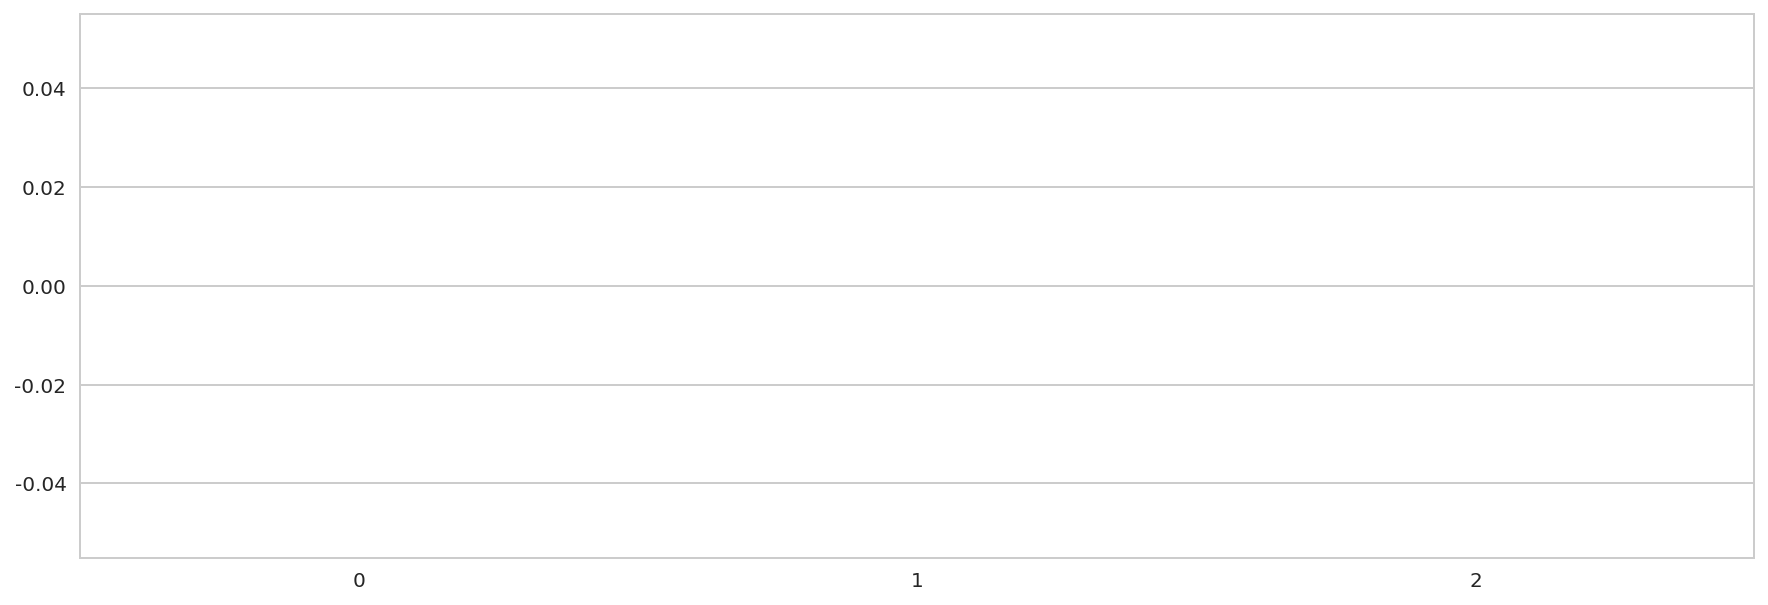

In [3]:
plt.figure(figsize=(15,5))
sns.barplot(np.arange(len(bureau_balance.isnull().sum().index)), bureau_balance.isnull().sum().values)

### 1) `SK_ID_BUREAU` - BUREAU ID 값
- 1) **Data Type**: Int
- 2) **Missing Values**: None
- 3) **Components**; `SK_ID_BUREAU`의 ID 값
- 4) **Category**: No
- 5) **특이사항**: 차원수가 다른 데이터 대비 많은 이유는, 1 ~ N 달의 Data를 갖고 있음.

### 2) `MONTHS_BALANCE` -  Month
- 1) **Data Type**: float
- 2) **Missing Values**: None
- 3) **Components**: Month를 숫자로 표현
- 4) **특이사항**: -1이 freshest balance data를 표현함. (-) 부호 사용
- 5) **Category**: Yes

### 3) `STATUS` - 그 달에 대한 Credit Bureau의 Loan 상태
- 1) **Data Type**: String (object)
- 2) **Missing Values**: None
- 3) **Components**: Loan 상태를 표시함
    - i) `0`: no DPD (Days Past Due)
    - ii) `1`: 1 ~ 30 Days Past Due
    - iii) `2`: 31 ~ 60 Days Past Due
    - iv) `3`: 61 ~ 90 Days Past Due
    - v) `4`: 91 ~ 120 Days Past Due
    - vi) `5`: `121+ Days Past Due` or `sold or written off`
    - vii) `X`: Unknown
    - viii) `C`: Closed 